### **Proyecto: Modelo de lenguaje neuronal basado en la arquitectura de Bengio (2003)**

*   Aquino Santiago Rogelio Gerardo
*   Moreno Madrid Maria Guadalupe
*   Ramírez Ancona Simón Eduardo
*   Ruiz Pérez Ariel

### **Objetivo:**
A partir del corpus **corpusML.txt** realizar un modelo del lenguaje neuronal con base en la arquitectura propuesta por Bengio (2003).

### **Introducion:**


Los modelos del lenguajes son una herramienta esencial en el PLN. Éstos se utilizan en múltiples aplicaciones. Su objetivo es estimar probabilidades de cadenas:

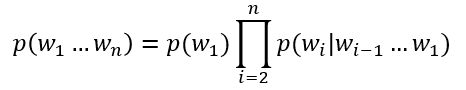

Aproximan estas probabilidades por medio de asumir la propiedad de Markov (n-gramas):

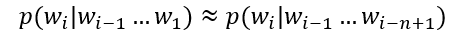

Un modelo (estadístico) del lenguaje es µ = (Σ, P), tal que Σ es vocabulario y P medida de probabilidad sobre $Σ^*$

Se busca estimar un modelo µ = (Σ, A, Π)tal que Σ es el vocabulario, A son probabilidades de transición:

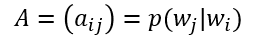

Y Π son probabilidades iniciales:

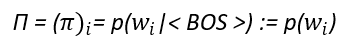

De esta forma, se pueden obtener las probabilidades de cadenas como:

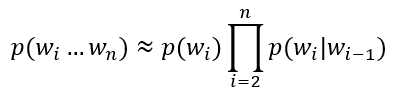

Bengio (2003) propone estimar los modelos del lenguaje a partir de las redes neuronales.
Sus objetivos son:

1.   Asociar cada palabra en el vocabulario con un vector distribuido en $R^b$
2.   Expresar la función de distribución conjunta de las secuencias de palabras por medio de estos vectores.
3.   Aprender de manera simultánea los vectores distribuidos y los parámetros de la función de probabilidad.






### **Desarrollo:**

0. __Lo primero será tener disponible el corpus.__

Para esta parte subímos el archivo a github y luego clonamos el repositorio en la máquina virtual donde se ejecuta el notebook, en caso de que se elimine el archivo solo ejecutar la celda de abajo.


In [ ]:
!git clone https://github.com/MariachiAncona/corpus.git
!mv /content/corpus/corpusML.txt /content/
!head corpusML.txt

fatal: destination path 'corpus' already exists and is not an empty directory.
mv: cannot stat '/content/corpus/corpusML.txt': No such file or directory
Comencé a trabajar y me pegaron, me maltrataron con chicote 
Mis patrones me pegaron porque no me quería apurar, porque era flojo 
Por eso, me habían pegado 
Cuando me pegaban ya entonces me quitaba 
Pues entonces no quise trabajar 
Ya no quise estar, como me pegaban 
Después ya estuve nomás en mi casa 
Fui a juntar caca de caballo 
Fui a juntar caquitas de caballo 
Se me aventaron las culebras 


1. __Limpiar los textos y aplicar stemming a las palabras.__

Esta sección se realizó a partir de algunos pasos del archivo en [este enlace](https://colab.research.google.com/drive/17p3ef9HyZ9N9rixGdr5yhLd_VGT0zpNk?usp=sharing) además de que se usaron algunas de las bibliotecas, por ejemplo nltk y regex.

In [ ]:
import nltk
import regex as re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Una vez disponible el corpus se procede a abrir el archivo y separar en tokens para poder aplicar el algoritmo de stemming (también parte de nltk).

In [ ]:
#Abriendo el archivo
try:
  with open('corpusML.txt','r') as f:
    corpus = []
    raw = f.read()
    for line in raw.split("\n"):
      corpus.append(line)
    print("Archivo abierto con éxito, tokenizado en variable corpus")
except:
  print('Ejecutar la primera celda si no existe el archivo punkt')


Archivo abierto con éxito, tokenizado en variable corpus


Hasta este punto el corpus ha sido leído y tokenizado en una lista, lo siguiente es limpiar el corpus para eliminar signos de puntuación y símbolos innecesarios.
También se separará en conjunto de oraciones para entrenamiento y para prueba, usando sklearn.

In [ ]:
#Limpiando el corpus de signos y símbolos
sents = []
for sent in corpus:
  sents.append(str.lower(re.sub(r"[^\w]", " ", sent)))
print(sents[:5])

['comencé a trabajar y me pegaron  me maltrataron con chicote ', 'mis patrones me pegaron porque no me quería apurar  porque era flojo ', 'por eso  me habían pegado ', 'cuando me pegaban ya entonces me quitaba ', 'pues entonces no quise trabajar ']


Una vez limpio el corpus se aplica el algoritmo de stemming, en este caso el stemmer de porter genérico de nltk _PorterStemmer_ no ayudó mucho así que se usó un stemmer para el español, también proporcionado por nltk.

In [ ]:
#Importando un objeto stemmer de nltk.
#Se usará un stemmer para español porque el resultado no es
# muy bueno con porter, es casi la misma oración lo que 
#alterará las probabilidades.
#['comencé', 'a', 'trabajar', 'y', 'me',
# 'pegaron', 'me', 'maltrataron', 'con', 'chicot']

#from nltk.stem import PorterStemmer
#ps = PorterStemmer()

#Aplicando el stemming a las palabras.

from nltk.stem.snowball import SpanishStemmer

ps = SpanishStemmer()
types = []

for sent in sents:
  types.append([ps.stem(w) for w in sent.split(" ") if w != ""])
print(sents[:5])
print(types[:5])

['comencé a trabajar y me pegaron  me maltrataron con chicote ', 'mis patrones me pegaron porque no me quería apurar  porque era flojo ', 'por eso  me habían pegado ', 'cuando me pegaban ya entonces me quitaba ', 'pues entonces no quise trabajar ']
[['comenc', 'a', 'trabaj', 'y', 'me', 'peg', 'me', 'maltrat', 'con', 'chicot'], ['mis', 'patron', 'me', 'peg', 'porqu', 'no', 'me', 'quer', 'apur', 'porqu', 'era', 'floj'], ['por', 'eso', 'me', 'hab', 'peg'], ['cuand', 'me', 'peg', 'ya', 'entonc', 'me', 'quit'], ['pues', 'entonc', 'no', 'quis', 'trabaj']]


2. __Insertar símbolos de inicio y final de cadena.__

In [ ]:
for t in types:
  t.insert(0,"<BOS>")
  t.append("<EOS>")
print(types[:5])

[['<BOS>', 'comenc', 'a', 'trabaj', 'y', 'me', 'peg', 'me', 'maltrat', 'con', 'chicot', '<EOS>'], ['<BOS>', 'mis', 'patron', 'me', 'peg', 'porqu', 'no', 'me', 'quer', 'apur', 'porqu', 'era', 'floj', '<EOS>'], ['<BOS>', 'por', 'eso', 'me', 'hab', 'peg', '<EOS>'], ['<BOS>', 'cuand', 'me', 'peg', 'ya', 'entonc', 'me', 'quit', '<EOS>'], ['<BOS>', 'pues', 'entonc', 'no', 'quis', 'trabaj', '<EOS>']]


En esta misma sección se indexará el vocabulario y se agregarán etiquetas _"\<OOV\>"_ para los hápax del vocabulario. 
Una vez indexado el vocabulario las palabras de frecuencia 1 serán reemplazadas por la etiqueta mencionada.

In [ ]:
#Indexando el vocabulario
from collections import Counter,defaultdict
from itertools import chain

#Aprovechando collections
#Frecuencia de los tipos
freq_words=Counter( chain(*[' '.join(sent).lower().split() for sent in types]))

corpus_hapax = []

#Recorre y reemplaza las palabras de frec 1
for sent in types:
  sent_hapax =[]
  for w in sent:
    if freq_words[w.lower()] == 1:
      sent_hapax.append('<oov>')
    else:
      sent_hapax.append(w.lower())
  corpus_hapax.append(sent_hapax)

#Creando el diccionario con las palabras indexadas
vocab = defaultdict()
vocab.default_factory = lambda: len(vocab)
voc_index = [[vocab[word] for word in line] for line in types]


print(corpus_hapax[:5])
print(voc_index[:5])

[['<bos>', '<oov>', 'a', 'trabaj', 'y', 'me', 'peg', 'me', '<oov>', 'con', '<oov>', '<eos>'], ['<bos>', 'mis', 'patron', 'me', 'peg', 'porqu', 'no', 'me', 'quer', 'apur', 'porqu', 'era', 'floj', '<eos>'], ['<bos>', 'por', 'eso', 'me', 'hab', 'peg', '<eos>'], ['<bos>', 'cuand', 'me', 'peg', 'ya', 'entonc', 'me', 'quit', '<eos>'], ['<bos>', 'pues', 'entonc', 'no', 'quis', 'trabaj', '<eos>']]
[[0, 1, 2, 3, 4, 5, 6, 5, 7, 8, 9, 10], [0, 11, 12, 5, 6, 13, 14, 5, 15, 16, 13, 17, 18, 10], [0, 19, 20, 5, 21, 6, 10], [0, 22, 5, 6, 23, 24, 5, 25, 10], [0, 26, 24, 14, 27, 3, 10]]


3. __Obtener los bigramas que aparecen en el texto.__



Para esta parte, se usarán algunas partes del código del profesor Victor Mijangos, alojado en [este enlace](https://github.com/VMijangos/Curso-Procesamiento-de-Lenguaje-Natural/blob/master/Notebooks/09b%20Language_model_bigram_big.ipynb).

In [ ]:
#Se crean los bigramas
bigrams = list(chain(*[zip(word,word[1:]) for word in voc_index]))

#Se obtiene la frecuencia de cada bigrama
frecBigrams = Counter(bigrams)

#Tamaño del vocabulario
N = len(voc_index)

print('Tamaño del vocabulario:', N)
print("bigramas: ", len(bigrams))
print(bigrams[:10])

Tamaño del vocabulario: 1075
bigramas:  9874
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 5), (5, 7), (7, 8), (8, 9)]


4. __Entrenar con los bigramas la red neuronal y obtener los valores para los hiperparámetros. Tomar de 100 a 300 unidades para la capa oculta.__

Se realizará la importación de algunas bibliotecas no usadas hasta ahora para que los métodos de la clase propuesta funcionen. correctamente. Además se separan los bigramas (Que es lo que se usa para la red) en conjunto para entrenamiento y conjunto para pruebas.

In [ ]:
#Split en corpus train y test
from sklearn.model_selection import train_test_split
import numpy as np

#El 0.3 denota el tamaño de la prueba, en este caso 30% del conjunto
bigrams, bigrams_test = train_test_split(bigrams, test_size=0.3)
print("Entrenamiento: ",len(bigrams))
print("Pruebas: ",len(bigrams_test))
print(bigrams[:5])

Entrenamiento:  6911
Pruebas:  2963
[(394, 29), (31, 32), (326, 465), (26, 750), (39, 328)]


Utilizaremos una clase del modelo de Bengio, tomaremos la celda 17 del [código](https://github.com/penserbjorne/clase-pln-2020-2/blob/master/02_practica/practica_2.ipynb) donde está definida la clase a utilizar: 

In [ ]:
class Bengio:
  # Constructor del objeto
  def __init__(self, bigrams, T, d, m, n, N):
    self.bigrams = bigrams
    self.T = T    # Numero de iteraciones
    self.d = d    # Dimension de los embeddings
    self.m = m    # Numero de unidades en la capa oculta
    self.n = n    # Rango de aprendizaje
    self.N = N    # Tamaño del vocabulario

  def initialize_params(self):
    self.C = np.random.random((self.d, self.N))/np.sqrt(self.N)
    self.W = np.random.random((self.m, self.d))/np.sqrt(self.d)
    self.b = np.random.random(self.m)
    self.U = np.random.random((self.N, self.m))/np.sqrt(self.m)
    self.c = np.random.random(self.N)
    self.R = []
    self.R_it = 0

  def forward(self, i_x):
    c_i = self.C[:,i_x]
    if np.size(np.dot(self.W, c_i)) == np.size(self.b): 
      h_i = np.tanh(np.dot(self.W, c_i) + self.b)
    else:
      h_i = np.tanh(np.dot(self.W, c_i))
    a_i = np.dot(self.U, h_i) + self.c
    e_a = np.exp(a_i - a_i.max())
    p_wk_wi = e_a / e_a.sum()
    return (p_wk_wi, h_i)

  def risk(self, p_wk_wi, i_y):
    self.R_it -= np.log(p_wk_wi[i_y].sum())

  def saveRisk(self):
    self.R.append(self.R_it)

  def getRisk(self):
    return self.R

  def backward(self, i_y, p_wk_wi, h_i):
    d_out = np.array(p_wk_wi, copy=True) 
    d_out[i_y] -= 1
    d_h = (1 - (h_i*h_i)) * np.dot(d_out.T, self.U)
    d_c = np.dot(d_h.T, self.W)
    return (d_out, d_h, d_c)


  def updateWeights(self, d_out, h_i, d_h, d_c, i_x):
    self.U -= self.n * np.outer(d_out, h_i)
    self.W -= self.n * np.outer(d_h, self.C[:, i_x])
    self.c -= self.n * d_out
    self.C[:, i_x] -=  self.n * d_c
    self.b -= self.n * d_h

#Único método modificado para que no muestre cada iteración
  def train(self):
    for it in range(0, self.T):
      self.R_it = 0
      for pair in self.bigrams:
        i_x = pair[0]
        i_y = pair[1] #Restando el símbolo inicial
        p_wk_wi, h_i = self.forward(i_x)
        self.risk(p_wk_wi, i_y)
        d_out, d_h, d_c = self.backward(i_y, p_wk_wi, h_i)
        self.updateWeights(d_out, h_i, d_h, d_c, i_x)
      self.saveRisk()
      print("Epoch: ", it, "\tEntropia cruzada: ", self.R_it)
    print("Finished")

  def entropy_phrase(self, sentence):
    entropy = 0
    for pair in sentence:
      i_x = pair[0]
      i_y = pair[1]
      p_wk_wi, h_i = self.forward(i_x)
      entropy -= np.log(p_wk_wi[i_y].sum())
    return entropy

  def predict(self, i_x):
    return np.argmax(self.forward(i_x)[0])


Procedemos a crear el modelo con los parámetros.

In [ ]:
# Creamos objeto del modelo y lo entrenamos
# Los parámetros del constructor son:
#   bigrams, iteraciones, embeddings, uni capa oculta,
#   learning rate, tamaño del diccionario considerando bos y eos
modelo = Bengio(bigrams, 5, 100, 300, 0.01, N)
modelo.initialize_params()
modelo.train()

Epoch:  0 	Entropia cruzada:  37820.48887319124
Epoch:  1 	Entropia cruzada:  35842.2188889669
Epoch:  2 	Entropia cruzada:  35025.37576888876
Epoch:  3 	Entropia cruzada:  34504.04947364847
Epoch:  4 	Entropia cruzada:  34016.860603208275
Finished


5. __Evaluar el modelo (con Entropía y Perplejidad).__

Para tener una idea de que tan bueno es el modelo que estimamos, podemos utilizar la entropía cruzada empírica dada por la función:

$$H_E(p) = -\frac{1}{M} \sum_{x_1,...,x_m}^N \log p(x_1, ...x_m)$$
En este caso, el modelo con menor entropía será aquel que mejor prediga una (o varias) cadenas no vistas. Por tanto, consideraremos que generaliza mejor.
La perplejidad se define en base a esta entropía como $2^{H_E(p)}$.

En nuestro caso para la entropía y perplejidad la clase tiene un método para recorrer los bigramas y calcular la entropía, que según como se dividió el conjunto solo le pasaremos como parámetro los bigramas de evaluación

In [ ]:
entropy_phrase = modelo.entropy_phrase(bigrams_test)

entropy_phrase /= len(bigrams_test)

print("Entropia del modelo evaluado: ", entropy_phrase)
print("Perplejidad del modelo: ", 2**entropy_phrase)

Entropia del modelo evaluado:  5.059825328708344
Perplejidad del modelo:  33.35486573166929


6. __Calcular la proabilidad de las siguientes oraciones:__
+ Nos bañamos con agua caliente
+ El animalito le olía la cabeza
+ Pascuala ordeñaba las vacas

In [ ]:
# Creamos el corpus
c_t = """
Nos bañamos con agua caliente\n
El animalito le olía la cabeza\n
Pascuala ordeñaba las vacas\n
"""
c_tl = []
for sent in c_t.split("\n"):
  if sent != '':
    c_tl.append(str.lower(re.sub(r"[^\w]", " ", sent)))

print(c_tl)

['nos bañamos con agua caliente', 'el animalito le olía la cabeza', 'pascuala ordeñaba las vacas']




Stemmer:



In [ ]:
stems = []
for sent in c_tl:
  stems.append([ps.stem(w) for w in sent.split(" ") if w != "" and w != []])

print(stems[:5])

[['nos', 'bañ', 'con', 'agu', 'calient'], ['el', 'animalit', 'le', 'oli', 'la', 'cabez'], ['pascual', 'ordeñ', 'las', 'vac']]


Inserción de símbolos:

In [ ]:
for i,t in enumerate(stems):
    t.insert(0,"<BOS>")
    t.append("<EOS>")
   
print(stems)

[['<BOS>', 'nos', 'bañ', 'con', 'agu', 'calient', '<EOS>'], ['<BOS>', 'el', 'animalit', 'le', 'oli', 'la', 'cabez', '<EOS>'], ['<BOS>', 'pascual', 'ordeñ', 'las', 'vac', '<EOS>']]


In [ ]:
dic_wk_train = { w: idx for w,idx in vocab.items()}
n_stems = []

ids_tmp = []
for word in line:
    ids_tmp.append(dic_wk_train.get(word, dic_wk_train.get("<oov>")))

for line in stems:
  for word in line:
    n_stems.append(dic_wk_train.get(word, dic_wk_train.get("<oov>")))

n_bigrams = []
n_bigrams = list(zip(n_stems, n_stems[1:])
print("Bigrama")
print(n_bigrams)

Bigrama
[(0, 389), (389, 931), (931, 8), (8, 252), (252, None), (None, 10), (10, 0), (0, 73), (73, 180), (180, 102), (102, 1022), (1022, 58), (58, 338), (338, 10), (10, 0), (0, 589), (589, 862), (862, 44), (44, 248), (248, 10)]


Finalmente se calculan las probabilidades de las oraciones con los nuevos bigramas obtenidos de las oraciones.

In [ ]:
# Tomandoel modelo de Bengio
def prob_phrase_by_bengio(bigrams, model):
    prob = 1
    for bigram in bigrams:
        i_x = bigram[0]
        i_y = bigram[1]
        #Manejando <oov>
        if i_y is None: i_y, i_x = 0, 6
        if i_x is None: i_y, i_x = 6, 0
        prob *= model.forward(i_x)[0][i_y]
        print("P: ", prob)
    return prob

min_i = 0
max_i = 0

for line in stems:
    print(line)
    max_i += len(line) - 1
    prob = prob_phrase_by_bengio(n_bigrams[min_i:max_i], modelo)
    print("Probabilidad de la frase: ", prob, "\n")
    min_i = max_i + 1
    max_i += 1

['<BOS>', 'nos', 'bañ', 'con', 'agu', 'calient', '<EOS>']
P:  0.004185980952449106
P:  1.1812237843968197e-05
P:  1.8393356447607428e-07
P:  2.799147486525452e-10
P:  2.0721316255810368e-15
P:  2.211004206569331e-18
Probabilidad de la frase:  2.211004206569331e-18 

['<BOS>', 'el', 'animalit', 'le', 'oli', 'la', 'cabez', '<EOS>']
P:  0.022161924835981804
P:  3.0753858751538834e-05
P:  1.3519321484237802e-07
P:  8.577964221227131e-11
P:  1.5015774517234578e-12
P:  1.875402347986495e-14
P:  7.286999054299841e-15
Probabilidad de la frase:  7.286999054299841e-15 

['<BOS>', 'pascual', 'ordeñ', 'las', 'vac', '<EOS>']
P:  0.0002637520126092727
P:  4.062444882898352e-08
P:  2.2824474642211238e-10
P:  1.5837247853817108e-12
P:  5.510208528505273e-13
Probabilidad de la frase:  5.510208528505273e-13 



###**Referencias:**

*   https://colab.research.google.com/drive/17p3ef9HyZ9N9rixGdr5yhLd_VGT0zpNk?usp=sharing
*   https://github.com/VMijangos/Curso-Procesamiento-de-Lenguaje-Natural/blob/master/Notebooks/09b%20Language_model_bigram_big.ipynb
*   https://github.com/penserbjorne/clase-pln-2020-2/blob/master/02_practica/practica_2.ipynb
*   Yoshua Bengio, Réjean Ducharme, Pascal Vincent, and Christian Jauvin.
A neural probabilistic language model.
Journal of machine learning research, 3(Feb):1137–1155, 2003.

